In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.optimizers import Adam
import tensorflow_datasets as tfds

In [ ]:
# Step 1: Load the Pre-trained MobileNetV2 Model (ImageNet)
# Using MobileNetV2 as the base model with ImageNet weights, excluding top fully connected layers
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # Freeze base model layers

In [ ]:
# Step 2: Add custom layers on top of the base model
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),  # Converts feature maps to a vector
    layers.Dense(128, activation='relu'),  # Fully connected layer
    layers.Dropout(0.5),  # Dropout for regularization
    layers.Dense(3, activation='softmax')  # 3 classes for Rock, Paper, Scissors
])

In [ ]:
# Step 3: Compile the Model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Step 4: Load the 'rock_paper_scissors' Dataset
(ds_train, ds_test), ds_info = tfds.load('rock_paper_scissors', split=['train', 'test'], shuffle_files=True,
                                         as_supervised=True, with_info=True)

In [ ]:
# Preprocessing: Resize images and normalize them
def preprocess(image, label):
    image = tf.image.resize(image, (224, 224))  # Resize to 224x224 (MobileNetV2 input size)
    image = image / 255.0  # Normalize to [0, 1] range
    return image, tf.one_hot(label, depth=3)  # One-hot encode labels (3 classes)

In [ ]:
# Apply preprocessing to the training and test datasets
ds_train = ds_train.map(preprocess).batch(32).prefetch(tf.data.AUTOTUNE)
ds_test = ds_test.map(preprocess).batch(32).prefetch(tf.data.AUTOTUNE)

In [ ]:
# Step 5: Train the Model
history = model.fit(ds_train, validation_data=ds_test, epochs=10)

Epoch 1/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 150s 2s/step - accuracy: 0.8604 - loss: 0.3476 - val_accuracy: 0.9462 - val_loss: 0.1785
Epoch 2/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 141s 2s/step - accuracy: 0.9990 - loss: 0.0172 - val_accuracy: 0.9005 - val_loss: 0.2067
Epoch 3/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 135s 2s/step - accuracy: 0.9970 - loss: 0.0120 - val_accuracy: 0.9570 - val_loss: 0.1097
Epoch 4/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 152s 2s/step - accuracy: 1.0000 - loss: 0.0024 - val_accuracy: 0.9274 - val_loss: 0.1644
Epoch 5/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 137s 2s/step - accuracy: 0.9999 - loss: 0.0027 - val_accuracy: 0.9543 - val_loss: 0.1021
Epoch 6/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 136s 2s/step - accuracy: 1.0000 - loss: 0.0018 - val_accuracy: 0.9355 - val_loss: 0.1764
Epoch 7/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 131s 2s/step - accuracy: 1.0000 - loss: 7.9621e-04 - val_accuracy: 0.9570 - val_loss: 0.1268
Epoch 8/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 159s 2s/step - accuracy: 1.0000 - loss: 8.3159e-04 - val_accuracy: 0.

In [ ]:
# Step 6: Evaluate the Model (Testing)
loss, accuracy = model.evaluate(ds_test)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

12/12 ━━━━━━━━━━━━━━━━━━━━ 17s 1s/step - accuracy: 0.9732 - loss: 0.0886
Test Accuracy: 97.04%


In [ ]:
# Step 7: Predict on the Test Dataset
predictions = model.predict(ds_test)

12/12 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step


In [ ]:
import matplotlib.pyplot as plt

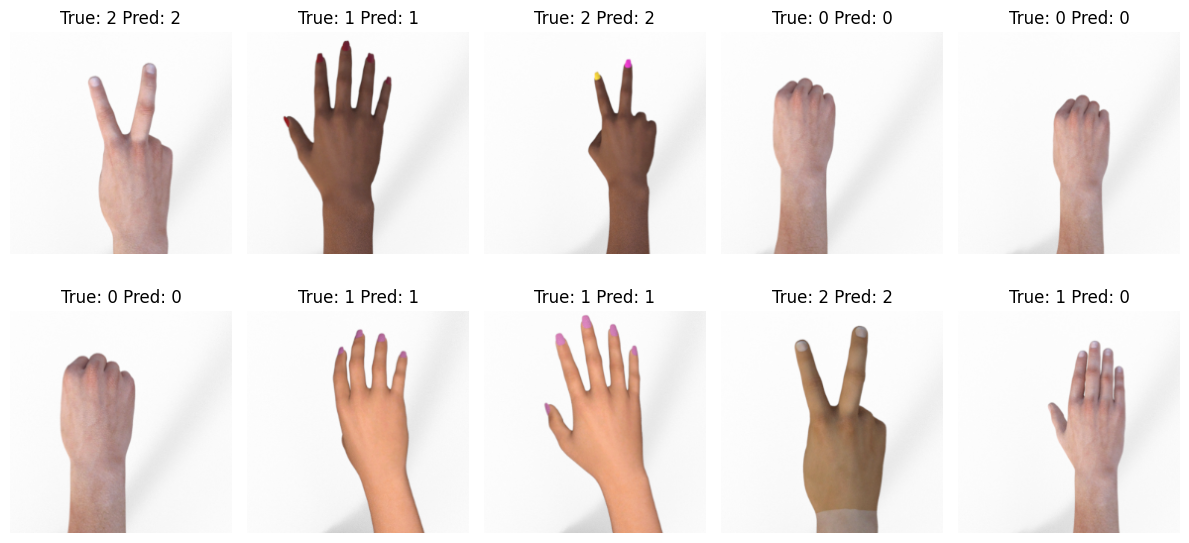

In [ ]:
# Step 8: Visualize Predictions with Input Images
def plot_predictions(images, true_labels, pred_labels):
    plt.figure(figsize=(12, 6))
    for i in range(len(images)):
        plt.subplot(2, 5, i + 1)  # 2 rows, 5 columns
        plt.imshow(images[i])  # Display the image
        plt.axis('off')
        plt.title(f'True: {true_labels[i]} Pred: {pred_labels[i]}')  # Show true and predicted labels
    plt.tight_layout()
    plt.show()

# Get images, true labels, and predictions for the first 10 samples
for images, labels in ds_test.take(1):
    predicted_labels = tf.argmax(predictions[:10], axis=-1)  # Get predicted labels for first 10 samples
    true_labels = tf.argmax(labels[:10], axis=-1)  # Get true labels for first 10 samples

    # Convert images to numpy for plotting
    images = images[:10].numpy()
    predicted_labels = predicted_labels.numpy()
    true_labels = true_labels.numpy()

    # Plot the predictions
    plot_predictions(images, true_labels, predicted_labels)

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224 (Functional)    │ (None, 7, 7, 1280)          │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_1           │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         163,968 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,751,051 (10.49 MB)

 Trainable params: 164,355 (642.01 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

 Optimizer params: 328,712 (1.25 MB)